In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 

In [1]:
pip install --force-reinstall "scikit-learn==1.0.2"

     ---------------------------------------- 7.2/7.2 MB 518.3 kB/s eta 0:00:00
     -------------------------------------- 301.2/301.2 kB 1.0 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
     ---------------------------------------- 46.2/46.2 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Can't uninstall 'numpy'. No files were found to uninstall.
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.1
    Uninstalling joblib-1.3.1:
      Successfully uninstalled joblib-1.3.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-le

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [5]:
!pip install tensorflow==2.14.0

In [2]:
# Load the Boston Housing dataset
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=42)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 2s 33ms/step - loss: 600.1631 - val_loss: 523.3556
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 567.6284 - val_loss: 490.9579
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 529.8518 - val_loss: 452.2562
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 485.2440 - val_loss: 403.9630
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 428.5387 - val_loss: 345.7099
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 359.8477 - val_loss: 277.5464
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 282.4674 - val_loss: 205.7857
Epoch 8/100
11/11 [==============================] - 0s 12ms/step - loss: 205.0256 - val_loss: 140.6066
Epoch 9/100
11/11 [==============================] - 0s 12ms/step - loss: 139.6425 - val_loss: 90.2674
Epoch 10/100
11/11 [==============================] - 0s 8ms/step -

In [6]:
# Evaluate the model
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 12.3205


12.320472717285156

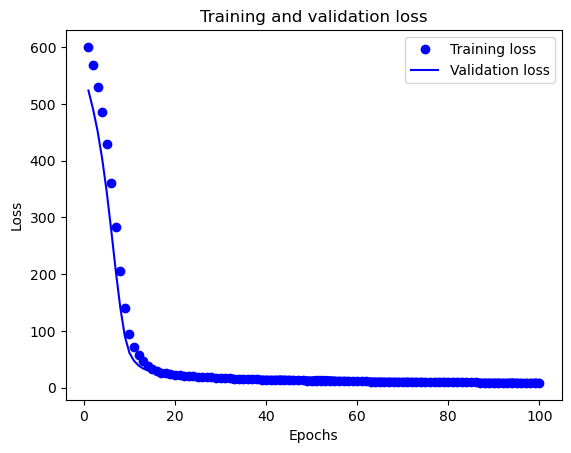

In [7]:
# Visualize the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


4/4 [==============================] - 0s 3ms/step


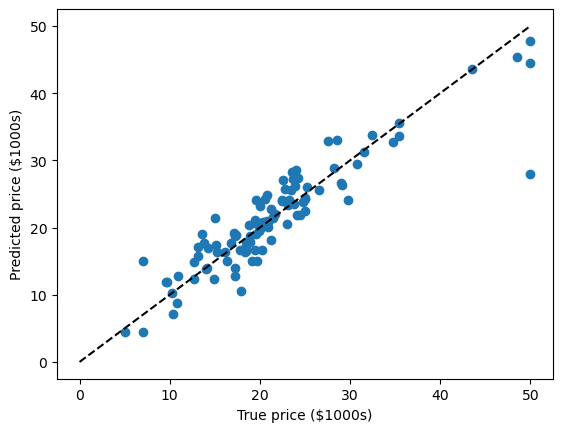

In [8]:
# Visualize the linear regression graph
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()